###Libraries and Data Loading

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#mount drive in colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#create a dataframe from the dataset
df = pd.read_csv('/content/drive/MyDrive/AIMLDS datasets/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


###Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
#check dataset dimension (rows,columns)
df.shape

(6335, 4)

In [8]:
#check columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [9]:
# Inspect the full text of any "text" column entry
text = df.loc[0, 'text']

display(text)

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [52]:
#check for any null values
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [53]:
#count target labels : fake and real
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

(array([0, 1]), [Text(0, 0, 'REAL'), Text(1, 0, 'FAKE')])

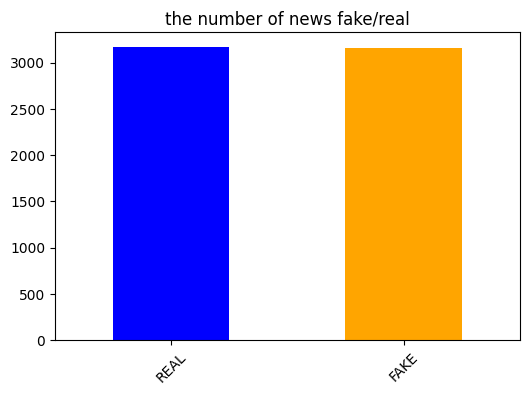

In [21]:
#visualize target labels in barplot
#we observe that fake and real news are balanced in the dataset
df['label'].value_counts().plot(kind="bar", figsize=(6,4), color=['blue','orange'])
plt.title('the number of news fake/real');
plt.xticks(rotation=45)

###Model Building using TdfidfVectorizer and PassiveAggressiveClassifier

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
#splitting the dataset in train : test ratio of 4:1
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.2, random_state=35)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
#initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7
#terms with a higher document frequency (english) will be discarded.
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [30]:
#initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)

###Evaluation of Model Performance

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
#evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [44]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[600  29]
 [ 49 589]]


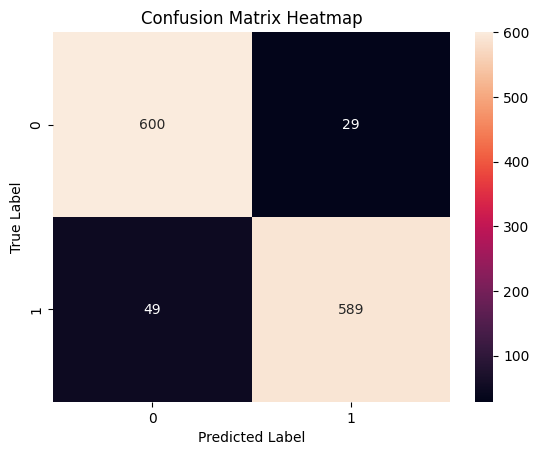

In [48]:
#visualize confusion matrix in heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### The model's accuracy is 94%

In [45]:
# classification report
def evaluate_model(y_true, y_pred):
  print("\nClassification Report:")
  print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred)



Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.94       629
        REAL       0.95      0.92      0.94       638

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

